## Import Data

Customer Segmentation using RFM modeling & K-Means

https://www.kaggle.com/code/parisrohan/customer-segmentation-using-rfm-modeling-k-means/notebook

In [1]:
import pandas as pd
from google.colab import files
import io

# Function to handle file upload and read it into a DataFrame
def handle_file_upload():
    uploaded_file = files.upload()
    for file_name, file_content in uploaded_file.items():
        # Assuming you want to read the first uploaded file if multiple files are uploaded
        return pd.read_excel(io.BytesIO(file_content))

# Call the function to upload the file and read it into a DataFrame
df = handle_file_upload()

# Now you can perform data analysis using the 'df' DataFrame


Saving rawdata_0.xlsx to rawdata_0.xlsx


In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.shape

(1044848, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044848 entries, 0 to 1044847
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044848 non-null  object        
 1   StockCode    1044848 non-null  object        
 2   Description  1040573 non-null  object        
 3   Quantity     1044848 non-null  int64         
 4   InvoiceDate  1044848 non-null  datetime64[ns]
 5   Price        1044848 non-null  float64       
 6   Customer ID  809561 non-null   float64       
 7   Country      1044848 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 63.8+ MB


In [6]:
import pandas as pd
from google.colab import files

# Assuming you have already loaded the data into the DataFrame 'df'
# If not, make sure you run the code to read the XLSX file into 'df' first.

# Convert the DataFrame to CSV with minimum size
csv_buffer = io.StringIO()
df.to_csv(csv_buffer, index=False, compression='gzip')

# Create a filename for the CSV file (e.g., "processed_data.csv")
csv_filename = "processed_data.csv"

# Save the CSV file to disk in the Colab environment
with open(csv_filename, 'w') as f:
    f.write(csv_buffer.getvalue())

# Download the CSV file to your local machine
files.download(csv_filename)


<ipython-input-6-e52521dc0e52>:9: RuntimeWarning: compression has no effect when passing a non-binary object as input.
  df.to_csv(csv_buffer, index=False, compression='gzip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Wrangling

**What is Customer Segmentation?** Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

**Types of Segmentation factors:**
*   Demographic (Age, Gender, Income, Location, Education, Ethnicity)
*   Psychographic (Interests, Lifestyles, Priorities, Motivation, Influence)
*   Behavioural (Purchasing habits, Spending habits, User status, Brand interactions)
*   Geographic (zip code, city, country, climate)

**Why Segment Customers?**
*   Test pricing options
*   Focus on the most profitable customers
*   Increase brand awareness
*   Create and communicate targeted marketing messages

In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235287
Country             0
dtype: int64

In [9]:
cust_country = df[['Country', 'Customer ID']].drop_duplicates()
cust_country.groupby(['Country'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID', ascending=False)

#df_data.groupby(['Country'])['Customer ID'].head()

,Country,Customer ID
40,United Kingdom,5410
15,Germany,107
14,France,95
34,Spain,41
3,Belgium,29
30,Portugal,24
26,Netherlands,23
36,Switzerland,22
35,Sweden,19
20,Italy,17


In [10]:
#keep only UK customer data
df_data = df.query("Country== 'United Kingdom'").reset_index(drop=True)

In [13]:
#From the df_info() command we can see that the 'Customer ID' feature has some null values
print('Number of customers having no ID: ',df_data['Customer ID'].isnull().sum())

Number of customers having no ID:  232320


In [14]:
#Ignore the transactions where there is no Customer ID
df_data = df_data[df_data['Customer ID'].notna()==True]

In [15]:
#As per our understanding, the Price feature does not contain any NULL values
#Check if there is any record with Price = 0
df_data[df_data['Price']==0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4399,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6424,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
15306,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
17855,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
17856,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom


In [16]:
#Check if there are any negative values in Price
df_data[df_data['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [17]:
#We will drop the records who have Price as 0
index_name = df_data[(df_data['Price']==0)].index
df_data.drop(index_name, inplace = True)

In [18]:
#data start
df_data['InvoiceDate'].min()

Timestamp('2009-12-01 07:45:00')

In [19]:
#data stop
df_data['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [20]:
#Check if there are any values as 0
df_data[df_data['Quantity']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [21]:
#Check if there are any negative values
df_data[df_data['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
157,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
158,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
159,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
160,C489459,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
161,C489459,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
...,...,...,...,...,...,...,...,...
958638,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
959694,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
959868,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
959869,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [22]:
#We will drop the records who have been cancelled -> Invoice start with C
index_name = df_data[(df_data['Quantity']<0)].index
df_data.drop(index_name, inplace = True)

In [23]:
df_data[df_data['Description'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [24]:
df_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [25]:
#Create a new feature named TotalPrice by multiplying Quantity and Price feature
df_data['TotalPrice'] = df_data['Quantity'] * df_data['Price']

In [26]:
#Get the top customers
df_data.groupby("Customer ID")["TotalPrice"].sum()

Customer ID
12346.0    77556.46
12608.0      415.79
12745.0      723.85
12746.0      254.55
12747.0     8917.98
             ...   
18283.0     2736.65
18284.0      461.68
18285.0      427.00
18286.0     1296.43
18287.0     4182.99
Name: TotalPrice, Length: 5350, dtype: float64

In [27]:
#data after cleaning
df_data2 = df_data.copy(deep=True)
df_data2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [28]:
df_data2.shape

(711882, 9)

##**RFM** Modelling

**RFM is an acronym for recency, frequency, and monetary value.**

*   Recency: How recently a customer has made a purchase
*   Frequency: How often a customer makes a purchase
*   Monetary Value: How much money a customer spends on purchases
*   List item

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

**Recency**

*   The more recently a customer has made a
purchase with a company, the more likely they will continue to keep the business and brand in mind for subsequent purchases. Compared with customers who have not bought from the business in months or even longer periods, the likelihood of engaging in future transactions with recent customers is arguably higher.
*   Such information can be used to get recent customers to revisit the business and spend more. In an effort not to overlook lapsed customers, marketing efforts might be made to remind them that it's been a while since their last transaction, while offering them an incentive to resume buying.

**Frequency**

*   The frequency of a customer’s transactions may be affected by factors such as the type of product, the price point for the purchase, and the need for replenishment or replacement. If the purchase cycle can be predicted — for example when a customer needs to buy more groceries — marketing efforts may be directed towards reminding them to visit the business when staple items run low.

**Monetary Value**

*   Monetary value stems from how much the customer spends. A natural inclination is to put more emphasis on encouraging customers who spend the most money to continue to do so. While this can produce a better return on investment in marketing and customer service, it also runs the risk of alienating customers who have been consistent but may not spend as much with each transaction.

Reference: https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp

In [31]:
#We will assign the next day after the last date recorded in the dataset as 'today_date'

#for datetime operations
import datetime as dt

today_date = dt.datetime(2023, 7, 30)

In [32]:
#We will change the datatype of InvoiceDate to datetime from object
df_data2['InvoiceDate'] = df_data2['InvoiceDate'].astype('datetime64')

<ipython-input-32-ba907aae3057>:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df_data2['InvoiceDate'] = df_data2['InvoiceDate'].astype('datetime64')


In [33]:
rfm = df_data2.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: num.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [34]:
rfm=rfm.reset_index()
rfm.head()

,Customer ID,InvoiceDate,Invoice,TotalPrice
0,12346.0,4575,12,77556.46
1,12608.0,4654,1,415.79
2,12745.0,4736,2,723.85
3,12746.0,4790,1,254.55
4,12747.0,4252,26,8917.98


In [35]:
#renaming the column names
rfm.columns = ['CustomerID','Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,4575,12,77556.46
1,12608.0,4654,1,415.79
2,12745.0,4736,2,723.85
3,12746.0,4790,1,254.55
4,12747.0,4252,26,8917.98


In [36]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,5350.000000,5350.000000,5350.000000,5350.000000
mean,15557.362617,4452.546168,6.269346,2699.904996
std,1581.161762,209.973818,11.995550,11712.749615
min,12346.000000,4250.000000,1.000000,2.950000
25%,14191.250000,4275.000000,1.000000,332.327500
50%,15565.500000,4348.000000,3.000000,834.355000
75%,16922.750000,4631.000000,7.000000,2160.505000
max,18287.000000,4988.000000,336.000000,580987.040000


In [37]:
#Split into four segments using quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [38]:
quantiles

{'CustomerID': {0.25: 14191.25, 0.5: 15565.5, 0.75: 16922.75},
 'Recency': {0.25: 4275.0, 0.5: 4348.0, 0.75: 4631.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 7.0},
 'Monetary': {0.25: 332.3275, 0.5: 834.355, 0.75: 2160.505}}

In [39]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [40]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm['R'] = rfm['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm['M'] = rfm['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,4575,12,77556.46,3,1,1
1,12608.0,4654,1,415.79,4,4,3
2,12745.0,4736,2,723.85,4,3,3
3,12746.0,4790,1,254.55,4,4,4
4,12747.0,4252,26,8917.98,1,1,1


In [41]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm['RFMGroup'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,12346.0,4575,12,77556.46,3,1,1,311,5
1,12608.0,4654,1,415.79,4,4,3,443,11
2,12745.0,4736,2,723.85,4,3,3,433,10
3,12746.0,4790,1,254.55,4,4,4,444,12
4,12747.0,4252,26,8917.98,1,1,1,111,3


In [42]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm.RFMScore, q = 4, labels = Loyalty_Level)
rfm['RFM_Loyalty_Level'] = Score_cuts.values
rfm.reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0,12346.0,4575,12,77556.46,3,1,1,311,5,Platinum
1,1,12608.0,4654,1,415.79,4,4,3,443,11,Bronze
2,2,12745.0,4736,2,723.85,4,3,3,433,10,Silver
3,3,12746.0,4790,1,254.55,4,4,4,444,12,Bronze
4,4,12747.0,4252,26,8917.98,1,1,1,111,3,Platinum


In [43]:
#Validate the data for RFMGroup = 111
rfm[rfm['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,5165,18102.0,4250,145,580987.04,1,1,1,111,3,Platinum
1,4527,17450.0,4258,51,244944.25,1,1,1,111,3,Platinum
2,857,13694.0,4253,143,195640.69,1,1,1,111,3,Platinum
3,4585,17511.0,4252,60,172132.87,1,1,1,111,3,Platinum
4,3776,16684.0,4254,55,147142.77,1,1,1,111,3,Platinum


##Feature Transformation

<ipython-input-44-377f8924998e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Recency'])
<ipython-input-44-377f8924998e>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Frequency'])
<ipython-input-44-377f8924998e>:16: UserWarning: 

`distplot` is a deprecated function and will be

<Axes: xlabel='Monetary', ylabel='Density'>

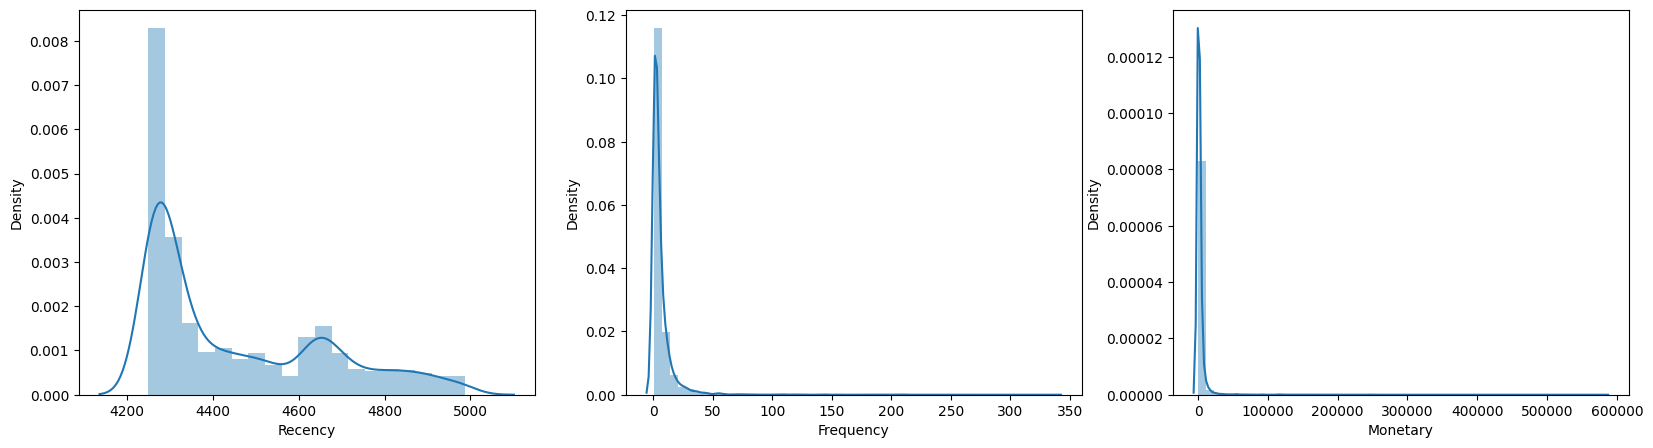

In [44]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Plot data distribution
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(rfm['Recency'])

plt.subplot(1,3,2)
sns.distplot(rfm['Frequency'])

plt.subplot(1,3,3)
sns.distplot(rfm['Monetary'])

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#apply log transformation
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

rfm_log.head()

,Recency,Frequency,Monetary
0,8.428,2.485,11.259
1,8.445,0.000,6.030
2,8.463,0.693,6.585
3,8.474,0.000,5.539
4,8.355,3.258,9.096


<ipython-input-47-888c50402887>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_log['Recency'])
<ipython-input-47-888c50402887>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_log['Frequency'])
<ipython-input-47-888c50402887>:11: UserWarning: 

`distplot` is a deprecated function and w

<Axes: xlabel='Monetary', ylabel='Density'>

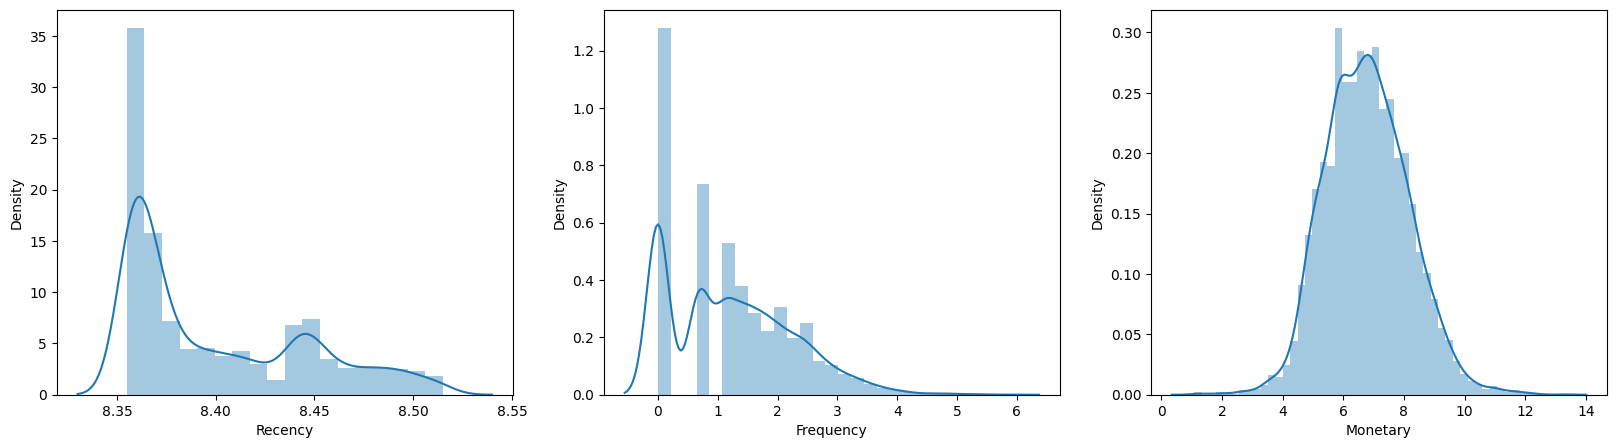

In [47]:
#Plot data distribution after log transformation
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(rfm_log['Recency'])

plt.subplot(1,3,2)
sns.distplot(rfm_log['Frequency'])

plt.subplot(1,3,3)
sns.distplot(rfm_log['Monetary'])

In [48]:
rfm_log.describe()

,Recency,Frequency,Monetary
count,5350.000000,5350.000000,5350.000000
mean,8.400141,1.208028,6.779955
std,0.046279,1.030144,1.376913
min,8.355000,0.000000,1.082000
25%,8.361000,0.000000,5.806000
50%,8.377000,1.099000,6.727000
75%,8.441000,1.946000,7.677750
max,8.515000,5.817000,13.272000


##Feature Scaling

In [50]:
#for stats and plotting
import scipy.stats as stat
import pylab

#for feature scaling
from sklearn.preprocessing import StandardScaler

#library for using K-Means algorithm
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

In [51]:
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm.index, columns= rfm_log.columns)
rfm_scaled.head()

,Recency,Frequency,Monetary
0,0.602021,1.239721,3.253267
1,0.969390,-1.172788,-0.544715
2,1.358370,-0.500003,-0.141602
3,1.596079,-1.172788,-0.901343
4,-0.975506,1.990171,1.682214


##K-Means Clustering

**Highlevel overview of K-Means algorithm:**



*   Vectorize feature values to define n-dimensional coordinates
*   **Decide value of 'K'** -> K is the number of clusters
*   K number of clusters are created with K centroids
*   Each datapoint is assigned to nearest cluster
*   New centroids are chosen based on Euclidian distance
*   Data points are reassigned to nearest cluster
*   The above steps are repeated untill there are no change.
*   From the above explanation it can be observed that **the value of K** needs to be determined before hand.
*   **Elbow Method** is used to find the optimal value of K





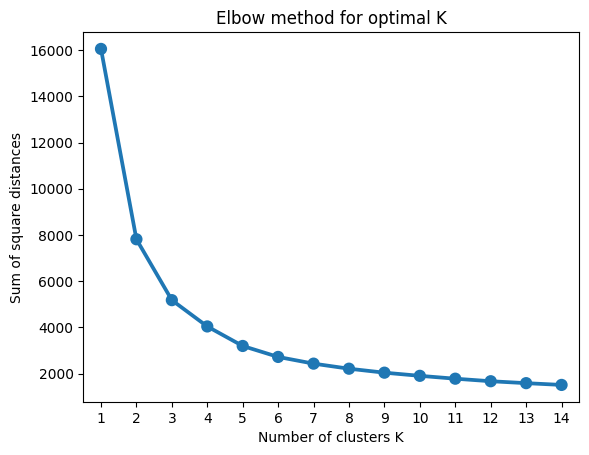

In [52]:
#wcss stands for within cluster sum of squares
wcss={}

for k in range(1,15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000 , random_state=20)
    km = km.fit(rfm_scaled)
    wcss[k] = km.inertia_

#Plot graph for the wcss values and the number of clusters
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of square distances')
plt.title('Elbow method for optimal K')
plt.show()

In [53]:
#Build K Means clustering model using K=4
kmean_model = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=20)
kmean_model.fit(rfm_scaled)

#find the clusters for the records given in our dataset
rfm['Cluster'] = kmean_model.labels_

#check the datset
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
0,12346.0,4575,12,77556.46,3,1,1,311,5,Platinum,0
1,12608.0,4654,1,415.79,4,4,3,443,11,Bronze,3
2,12745.0,4736,2,723.85,4,3,3,433,10,Silver,3
3,12746.0,4790,1,254.55,4,4,4,444,12,Bronze,3
4,12747.0,4252,26,8917.98,1,1,1,111,3,Platinum,0


In [54]:
rfm.Cluster.value_counts()

2    1748
3    1464
1    1165
0     973
Name: Cluster, dtype: int64

In [55]:
rfm[rfm['Cluster']==0].describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.0
mean,15513.312436,4291.987667,20.674203,10765.480626,1.521069,1.034943,1.021583,3.577595,0.0
std,1588.264030,68.564783,22.676371,25913.519267,0.704788,0.204909,0.145391,0.751810,0.0
min,12346.000000,4250.000000,2.000000,1621.280000,1.000000,1.000000,1.000000,3.000000,0.0
25%,14145.000000,4257.000000,11.000000,3708.300000,1.000000,1.000000,1.000000,3.000000,0.0
50%,15502.000000,4268.000000,14.000000,5547.720000,1.000000,1.000000,1.000000,3.000000,0.0
75%,16905.000000,4297.000000,22.000000,9266.000000,2.000000,1.000000,1.000000,4.000000,0.0
max,18287.000000,4759.000000,336.000000,580987.040000,4.000000,3.000000,2.000000,7.000000,0.0


In [56]:
rfm[rfm['Cluster']==1].describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.0
mean,15592.057511,4354.872103,1.655794,395.847210,2.181116,3.476395,3.411159,9.068670,1.0
std,1604.703182,88.388036,0.758103,273.642053,0.762516,0.534546,0.617649,1.257454,0.0
min,12821.000000,4250.000000,1.000000,6.200000,1.000000,2.000000,1.000000,6.000000,1.0
25%,14171.000000,4280.000000,1.000000,201.140000,2.000000,3.000000,3.000000,8.000000,1.0
50%,15553.000000,4322.000000,2.000000,343.450000,2.000000,3.000000,3.000000,9.000000,1.0
75%,16988.000000,4427.000000,2.000000,514.560000,3.000000,4.000000,4.000000,10.000000,1.0
max,18282.000000,4546.000000,6.000000,2626.300000,3.000000,4.000000,4.000000,11.000000,1.0


In [57]:
rfm[rfm['Cluster']==2].describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.0
mean,15535.967963,4362.289474,5.216247,1623.318860,2.128719,2.088673,1.965103,6.182494,2.0
std,1541.537009,122.816815,2.079455,939.430044,0.901579,0.606800,0.619688,1.321476,0.0
min,12828.000000,4250.000000,1.000000,167.420000,1.000000,1.000000,1.000000,3.000000,2.0
25%,14222.250000,4272.000000,4.000000,976.892500,1.000000,2.000000,2.000000,5.000000,2.0
50%,15616.000000,4310.000000,5.000000,1389.665000,2.000000,2.000000,2.000000,6.000000,2.0
75%,16833.500000,4419.250000,6.000000,2043.512500,3.000000,2.000000,2.000000,7.000000,2.0
max,18277.000000,4860.000000,15.000000,11880.840000,4.000000,4.000000,4.000000,9.000000,2.0


In [58]:
rfm[rfm['Cluster']==3].describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.0
mean,15584.575137,4744.747268,1.624317,458.303081,3.837432,3.552596,3.396175,10.786202,3.0
std,1604.615523,118.031457,0.985671,651.107191,0.369097,0.608636,0.732144,1.235741,0.0
min,12608.000000,4540.000000,1.000000,2.950000,3.000000,1.000000,1.000000,7.000000,3.0
25%,14189.250000,4647.000000,1.000000,169.405000,4.000000,3.000000,3.000000,10.000000,3.0
50%,15565.000000,4713.500000,1.000000,314.625000,4.000000,4.000000,4.000000,11.000000,3.0
75%,17008.250000,4841.250000,2.000000,554.970000,4.000000,4.000000,4.000000,12.000000,3.0
max,18286.000000,4988.000000,9.000000,10953.500000,4.000000,4.000000,4.000000,12.000000,3.0


<Figure size 700x700 with 0 Axes>

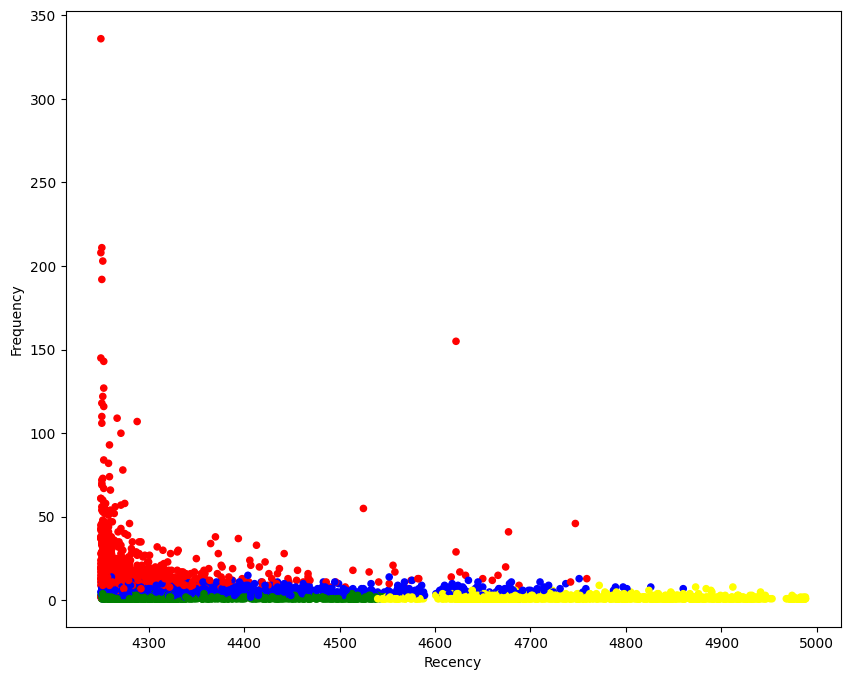

In [59]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", "yellow"]
rfm['Color'] = rfm['Cluster'].map(lambda p: Colors[p])
ax = rfm.plot(
    kind="scatter",
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = rfm['Color']
)

In [60]:
rfm['RFM_Loyalty_Level'].value_counts()

Gold        1608
Platinum    1516
Silver      1125
Bronze      1101
Name: RFM_Loyalty_Level, dtype: int64

In [61]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
0,12346.0,4575,12,77556.46,3,1,1,311,5,Platinum,0,red
1,12608.0,4654,1,415.79,4,4,3,443,11,Bronze,3,yellow
2,12745.0,4736,2,723.85,4,3,3,433,10,Silver,3,yellow
3,12746.0,4790,1,254.55,4,4,4,444,12,Bronze,3,yellow
4,12747.0,4252,26,8917.98,1,1,1,111,3,Platinum,0,red
